In [3]:
%matplotlib inline

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.optimize as op
import math as math
from sklearn import svm, datasets

# use seaborn plotting defaults
import seaborn as sns; sns.set()

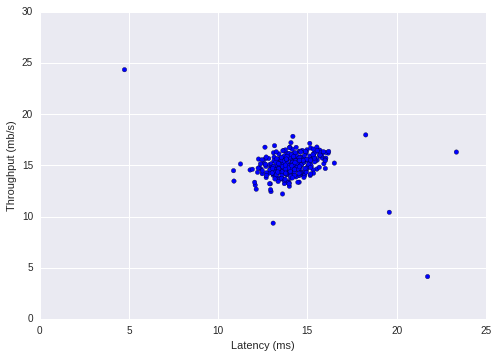

In [4]:
# Load and visulaize data
data = sio.loadmat('ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

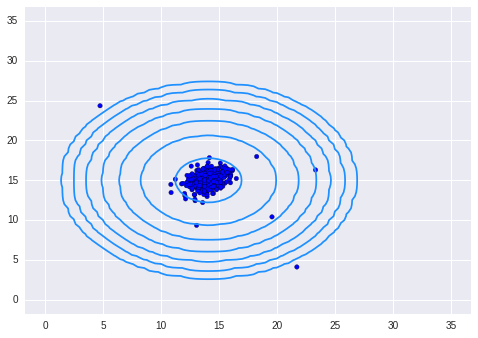

In [42]:
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    
    return mu, sigma2

import math
def predictGaussianProbabilty(X, mu, sigma2):
    a = 1 / np.sqrt(2 * np.pi * sigma2)  
    b =  np.e** -( ((X - mu)**2) / (2 * sigma2))
    p = a * b
    
    if p.ndim == 1:
        return p.prod()     
    else:
        return  p.prod(axis = 1)
        
        
           
# Get the gaussian distribution parameters for the dataset X
mu, sigma2 = estimateGaussian(X)

# Create the grid of coordinate on which to plot the contours of probability
u = np.arange(0, 35.5, 0.5)
v = np.arange(0, 35.5, 0.5)
from itertools import product
coordinates = np.array(list(product(u, v)))

# Get the probability on the grid for the learnt gaussian distribution
Z = predictGaussianProbabilty(coordinates, mu, sigma2)
Z_plot = Z.reshape(u.shape[0], u.shape[0])

# Display the contour plot. h is used to spread out the density of the drawn contours
h = 10.** np.arange(-20,0,3)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(u, v, Z_plot.T, h, colors='dodgerblue')



In [52]:
def selectThreshhold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    
    stepSize = (max(pval) - min(pval)) / 1000
    
    epsilon = min(pval)
    result = np.less(pval, epsilon)
    numOfCorrect = (sum(np.equal(result, yval)))  # True Positives + True Negatives#             
        
    for epsilon in np.arange(min(pval), max(pval), stepSize): 
        
        truePositives = 0
        trueNegatives = 0
        falsePositives = 0
        falseNegatives = 0
        
        prediction = np.less(pval, epsilon)
    
        for index, example in enumerate(prediction):
            if example == yval[index]:
                if example == True:
                    truePositives += 1
                if example == False:
                    trueNegatives += 1
            else:
                if example == True:
                    falsePositives += 1
                if example == False:
                    falseNegatives += 1
        
        if truePositives == 0:
            precision = 0
            recall = 0
            F1 = 0
        else: 
            precision = truePositives / (truePositives + falsePositives)
            recall = truePositives / (truePositives + falseNegatives)
            F1 = (2 * precision * recall) / (precision + recall)
    
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
            
    return bestEpsilon
    

pval = predictGaussianProbabilty(Xval, mu, sigma2)
epsilon = selectThreshhold(yval, pval)
print(epsilon)




8.99085277927e-05


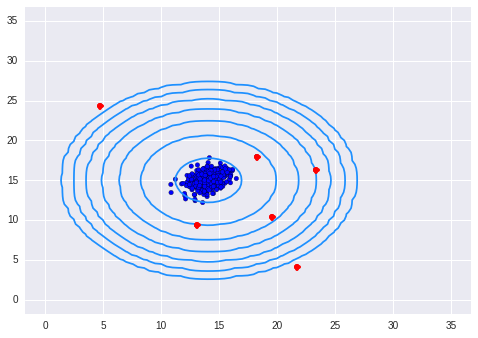

In [81]:
# Display the original data and contour plot
h = 10.** np.arange(-20,0,3)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(u, v, Z_plot.T, h, colors='dodgerblue')

# Go through data and using the learnt episilon value, show which data points are classfied as anonalies
X_probabilities = predictGaussianProbabilty(X, mu, sigma2)
X_predictions = np.less(X_probabilities, epsilon)
for index, example in enumerate(X_predictions):
    if example == True:
        plt.plot(X[index, 0], X[index, 1], 'ro')

In [86]:
# Load the harder dataset
data = sio.loadmat('ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

mu , sigma2 = estimateGaussian(X)
pval =  predictGaussianProbabilty(Xval, mu, sigma2)

epsilon = selectThreshhold(yval, pval)


# Go through data and using the learnt episilon value, show which data points are classfied as anonalies
X_probabilities = predictGaussianProbabilty(X, mu, sigma2)
X_predictions = np.less(X_probabilities, epsilon)
numOfAnomalies = 0
for index, example in enumerate(X_predictions):
    if example == True:
        numOfAnomalies += 1
        
print("Epsilon Value: ", epsilon)
print("Number of Detected Anomalies: ", numOfAnomalies)

Epsilon Value:  1.37722889076e-18
Number of Detected Anomalies:  117
